# Développez un moteur de recommandations de films

## Récupération et visualisation des données

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Set number of columns to show in the notebook
pd.set_option('display.max_columns', 200)
# Set number of rows to show in the notebook
pd.set_option('display.max_rows', 100) 
# Make the graphs a bit prettier
#pd.set_option('display.mpl_style', 'default') 
plt.style.use('default')

# Méthode de suppression de colonne
def DropCol(p_df, p_col):
    if p_col in p_df.columns:
        p_df = p_df.drop([p_col], axis=1)
    return p_df

In [2]:
# Récupération du fichier en local
dataraw = pd.read_csv('movie_metadata.csv')
dataraw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

In [3]:
dataraw.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
# Visualisation des deux types de données
df_str = dataraw.select_dtypes(exclude=[np.number])
DropCol(df_str, 'movie_imdb_link').describe()

,color,director_name,actor_2_name,genres,actor_1_name,movie_title,actor_3_name,plot_keywords,language,country,content_rating
count,5024,4939,5030,5043,5036,5043,5020,4890,5031,5038,4740
unique,2,2398,3032,914,2097,4917,3521,4760,47,65,18
top,Color,Steven Spielberg,Morgan Freeman,Drama,Robert De Niro,Victor Frankenstein,Ben Mendelsohn,based on novel,English,USA,R
freq,4815,26,20,236,49,3,8,4,4704,3807,2118


In [5]:
df_num = dataraw.select_dtypes(include=[np.number])
df_num.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


### Distribution des scores

6.442137616498111


Text(0.5,1,'Distribution des scores')

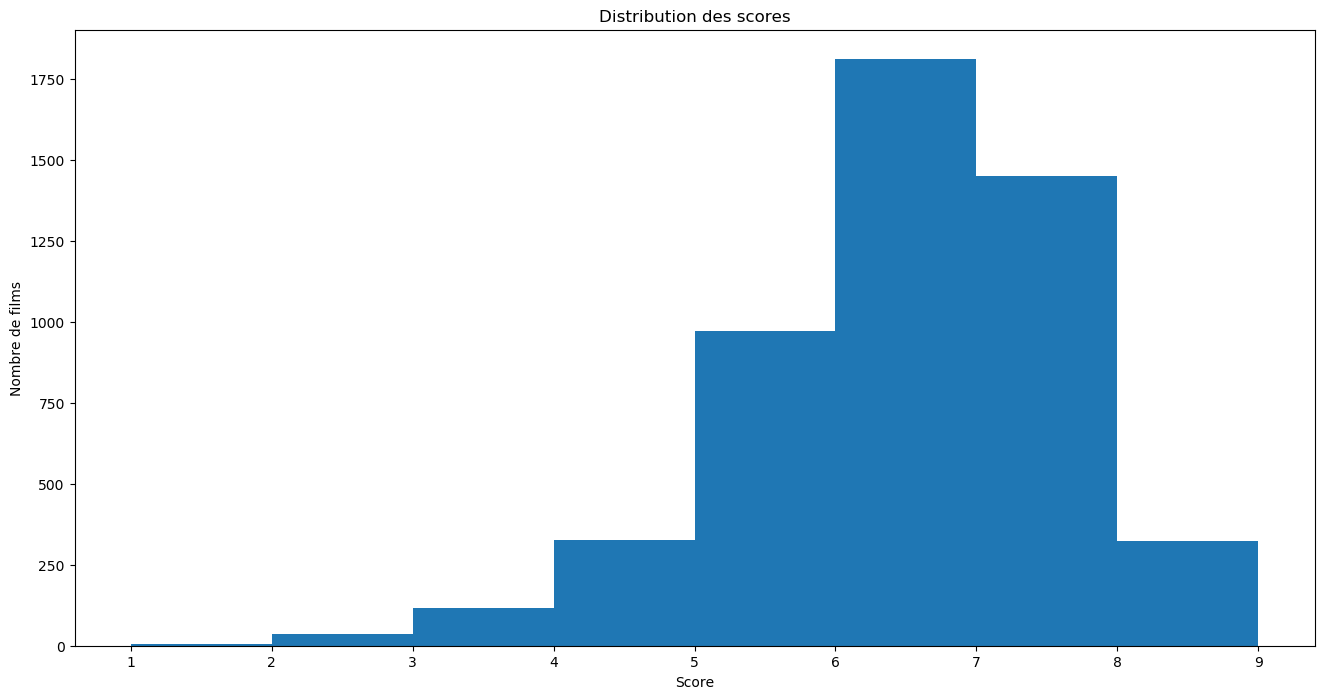

In [6]:
print(np.mean(dataraw.imdb_score))
plt.figure(figsize=(16, 8))
bins = range(1, 10)
plt.hist(dataraw.imdb_score, bins=bins)
plt.xlabel("Score")
plt.ylabel("Nombre de films")
plt.title("Distribution des scores")

### Les meilleurs films

In [7]:
tmp = dataraw.sort_values(by='imdb_score', ascending=False)
tmp[['movie_title', 'imdb_score', 'director_name']].head(10)

,movie_title,imdb_score,director_name
2765,Towering Inferno,9.5,John Blanchard
1937,The Shawshank Redemption,9.3,Frank Darabont
3466,The Godfather,9.2,Francis Ford Coppola
4409,Kickboxer: Vengeance,9.1,John Stockwell
2824,Dekalog,9.1,NaN
3207,Dekalog,9.1,NaN
66,The Dark Knight,9.0,Christopher Nolan
2837,The Godfather: Part II,9.0,Francis Ford Coppola
3481,Fargo,9.0,NaN
339,The Lord of the Rings: The Return of the King,8.9,Peter Jackson


## Nettoyage

In [8]:
# Suppression des caractères spéciaux
df = dataraw.copy()
df['movie_title']=[(df['movie_title'][i].replace(u'\xa0', u'').strip()) for i in range(0, df.shape[0])]
#df['title_year']=[(int(df['title_year'][i])) for i in range(0, df.shape[0])]

### Les doublons

In [9]:
# Il y a quelques doublons évidents
print(df.shape)
df = df.drop_duplicates()
df = df.reset_index(drop=True)
print(df.shape)
df.head()

(5043, 28)
(4998, 28)


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [10]:
# Recherche des doublons sur le nom du film
icount = {}
for i in df.movie_title:
    icount[i] = icount.get(i, 0) + 1
i=0
# Les doublons
for k, v in icount.items():
    if v>1:
        print(v, 'fois', k)
        i+=1
        if i%27==0:print('')

2 fois Spider-Man 3
3 fois King Kong
2 fois Skyfall
2 fois Alice in Wonderland
2 fois Oz the Great and Powerful
2 fois TRON: Legacy
2 fois The Great Gatsby
2 fois The Jungle Book
2 fois The Lovers
2 fois The Fast and the Furious
2 fois Pan
2 fois Ghostbusters
2 fois Exodus: Gods and Kings
3 fois Home
2 fois Clash of the Titans
2 fois RoboCop
2 fois Teenage Mutant Ninja Turtles
2 fois Around the World in 80 Days
2 fois The Island
2 fois Casino Royale
2 fois Planet of the Apes
2 fois The Tourist
2 fois Point Break
2 fois Cinderella
2 fois The Lovely Bones
3 fois Ben-Hur
2 fois Conan the Barbarian

2 fois Dredd
2 fois Creepshow
2 fois The Day the Earth Stood Still
2 fois Jack Reacher
2 fois Mercury Rising
2 fois Goosebumps
2 fois The Watch
2 fois Lolita
2 fois Syriana
2 fois Murder by Numbers
2 fois The Host
2 fois First Blood
2 fois Across the Universe
2 fois Victor Frankenstein
2 fois The Karate Kid
2 fois Unknown
2 fois Disturbia
2 fois Precious
2 fois Twilight
2 fois Aloha
2 fois A Ni

In [11]:
#dataraw.groupby(['movie_title']).sum()
#icount = sorted(icount.items(), key=lambda t: -t[1])

doublons = []
doublonsmineurs = []
# Recherche des colonnes différentes
for (k,v) in icount.items():
    if v > 1:
        # Recherche des valeurs différentes
        dftmp = df[df.movie_title == k]
        dftmp = dftmp.reset_index(drop=True)
        #print(dftmp.shape[0])
        # Pour chaque ligne en double
        ncol = 0
        for i in range(1, v):
            # On regarde les valeurs de chaque colonne
            for col in dftmp:
                if dftmp[col][0] != dftmp[col][i] and (pd.notnull(dftmp[col][0]) or pd.notnull(dftmp[col][i])):
                    if (dftmp[col].dtype == 'float64' or dftmp[col].dtype == 'int64') and col != 'title_year' and col != 'duration':
                        # On regarde si la différence est grande ou pas (+ ou - 10%)
                        if dftmp[col][0]*90/100 < dftmp[col][i] and dftmp[col][0]*110/100 > dftmp[col][i]:
                            # On ne s'en occupe pas
                            doublonsmineurs.append(col)
                            continue
                    print(v, k, col, dftmp[col][0], 'vs', dftmp[col][i])
                    ncol += 1
        if ncol == 0:
            # Pas de grosses différences, on peut garder une ligne et supprimer les autres 
            df = df.drop(df[df.movie_title == k].index[1:])
            df = df.reset_index(drop=True)
            #print(dataraw.shape)
        else:
            doublons.append(k)

# Il y a quelques doublons de nom qu'on ne peut pas supprimer car il y vraiment deux films différents
# The host
# The dead zone
# Out of the blue
print(doublons)

3 Ben-Hur plot_keywords nan vs chariot race|epic|false accusation|jerusalem|slave
3 Ben-Hur budget nan vs 100000000.0
3 Ben-Hur num_voted_users 57 vs 67
3 Ben-Hur plot_keywords nan vs chariot race|epic|false accusation|jerusalem|slave
3 Ben-Hur budget nan vs 100000000.0
2 The Host director_name Andrew Niccol vs Joon-ho Bong
2 The Host num_critic_for_reviews 298.0 vs 363.0
2 The Host duration 125.0 vs 110.0
2 The Host director_facebook_likes 487.0 vs 584.0
2 The Host actor_3_facebook_likes 201.0 vs 74.0
2 The Host actor_2_name Chandler Canterbury vs Kang-ho Song
2 The Host actor_1_facebook_likes 430.0 vs 629.0
2 The Host gross 26616999.0 vs 2201412.0
2 The Host genres Action|Adventure|Romance|Sci-Fi|Thriller vs Comedy|Drama|Horror|Sci-Fi
2 The Host actor_1_name J.D. Evermore vs Doona Bae
2 The Host num_voted_users 92461 vs 68883
2 The Host actor_3_name Rachel Roberts vs Ah-sung Ko
2 The Host facenumber_in_poster 3.0 vs 0.0
2 The Host plot_keywords alien|alien creature|body snatching|des

In [12]:
print(set(doublonsmineurs))

{'actor_1_facebook_likes', 'actor_2_facebook_likes', 'cast_total_facebook_likes', 'movie_facebook_likes', 'imdb_score', 'num_user_for_reviews', 'num_voted_users', 'actor_3_facebook_likes'}


In [13]:
df[df.movie_title.isin(doublons)].sort_values(['movie_title', 'title_year'], ascending=False)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
993,Color,Andrew Niccol,298.0,125.0,487.0,201.0,Chandler Canterbury,430.0,26616999.0,Action|Adventure|Romance|Sci-Fi|Thriller,J.D. Evermore,The Host,92461,1300,Rachel Roberts,3.0,alien|alien creature|body snatching|desert|par...,http://www.imdb.com/title/tt1517260/?ref_=fn_t...,347.0,English,USA,PG-13,4.000000e+07,2013.0,329.0,5.9,2.35,43000
2941,Color,Joon-ho Bong,363.0,110.0,584.0,74.0,Kang-ho Song,629.0,2201412.0,Comedy|Drama|Horror|Sci-Fi,Doona Bae,The Host,68883,1173,Ah-sung Ko,0.0,daughter|han river|monster|river|seoul,http://www.imdb.com/title/tt0468492/?ref_=fn_t...,279.0,Korean,South Korea,R,1.221550e+10,2006.0,398.0,7.0,1.85,7000
3079,Color,David Cronenberg,112.0,103.0,0.0,275.0,Herbert Lom,1000.0,NaN,Horror|Sci-Fi|Thriller,Tom Skerritt,The Dead Zone,44804,2013,Anthony Zerbe,0.0,car accident|coma|evil politician|psychic|vision,http://www.imdb.com/title/tt0085407/?ref_=fn_t...,182.0,English,USA,R,1.000000e+07,1983.0,278.0,7.2,1.85,0
2663,Color,NaN,18.0,60.0,NaN,186.0,Nicole de Boer,443.0,NaN,Drama|Fantasy|Mystery|Sci-Fi,David Ogden Stiers,The Dead Zone,7122,981,Chris Bruno,1.0,psychic|psychic power|psychometry|spin off|sup...,http://www.imdb.com/title/tt0281432/?ref_=fn_t...,77.0,English,Canada,TV-14,NaN,NaN,319.0,7.5,NaN,576
3773,Color,Robert Sarkies,43.0,100.0,0.0,3.0,Matthew Sunderland,109.0,728.0,Crime|Drama,William Kircher,Out of the Blue,2776,122,Paul Glover,0.0,true crime,http://www.imdb.com/title/tt0839938/?ref_=fn_t...,22.0,English,New Zealand,NaN,NaN,2006.0,10.0,7.3,1.85,285
3724,Color,Dennis Hopper,24.0,94.0,0.0,51.0,Don Gordon,311.0,NaN,Drama,Raymond Burr,Out of the Blue,1599,498,Jim Byrnes,1.0,explosion|hitchhiking|punk|trauma|truck driver,http://www.imdb.com/title/tt0081291/?ref_=fn_t...,27.0,English,Canada,R,2.200000e+06,1980.0,59.0,7.2,1.85,274
1835,Color,Jim Sheridan,217.0,105.0,260.0,3000.0,Jake Gyllenhaal,20000.0,28501651.0,Drama|Thriller,Natalie Portman,Brothers,88035,42473,Bailee Madison,0.0,afghanistan|death of soldier|presumed dead|pri...,http://www.imdb.com/title/tt0765010/?ref_=fn_t...,201.0,English,USA,R,2.600000e+07,2009.0,15000.0,7.1,2.35,10000
2837,Color,Jim Sheridan,217.0,105.0,260.0,1000.0,Jake Gyllenhaal,20000.0,28501651.0,Drama|Thriller,Natalie Portman,Brothers,88037,39473,Ethan Suplee,0.0,afghanistan|death of soldier|presumed dead|pri...,http://www.imdb.com/title/tt0765010/?ref_=fn_t...,201.0,English,USA,R,2.600000e+07,2009.0,15000.0,7.1,2.35,10000
363,Color,Timur Bekmambetov,1.0,141.0,335.0,635.0,Ayelet Zurer,11000.0,NaN,Adventure|Drama|History,Morgan Freeman,Ben-Hur,57,13379,Moises Arias,2.0,NaN,http://www.imdb.com/title/tt2638144/?ref_=fn_t...,1.0,English,USA,PG-13,NaN,2016.0,745.0,6.1,2.35,0
2577,Color,Timur Bekmambetov,1.0,141.0,335.0,635.0,Ayelet Zurer,11000.0,NaN,Adventure|Drama|History,Morgan Freeman,Ben-Hur,62,13390,Moises Arias,2.0,chariot race|epic|false accusation|jerusalem|s...,http://www.imdb.com/title/tt2638144/?ref_=fn_t...,1.0,English,USA,PG-13,1.000000e+08,2016.0,744.0,6.1,2.35,0


In [14]:
# D'après le lien imbd la série est sortie en 2002
tmp = df[df.movie_title=="The Dead Zone"]
i = tmp[pd.isnull(tmp.title_year)].index
if len(i) > 0:
    df.loc[i[0], 'title_year'] = 2002

In [15]:
# On renomme l'oeuvre la plus vieille en movie_title+(title_year), on garde la plus récente telle quelle
# Et si encore doublon on supprime la ligne sans budget
tmp = df[df.movie_title.isin(doublons)].sort_values(by=['movie_title', 'title_year'], ascending=False)
lastTitle = ""
lastYear = 0
lastBudget = 0
lastIndex = 0
iSuppr = []
for index, row in tmp.iterrows():
    if lastTitle == row['movie_title'] and lastYear == row['title_year']:
        # Même titre même année
        if(pd.isnull(lastBudget)):
            # Budget absent, on supprime
            iSuppr.append(lastIndex)
            print("Suppression de l'index", lastIndex, "(", lastTitle, ", budget absent)")
        else:
            iSuppr.append(index)
            print("Suppression de l'index", index, "(", lastTitle, ")")
            # La ligne n'est plus, on continue
            continue
    elif lastTitle == row['movie_title'] and lastYear != row['title_year'] and pd.notnull(row['title_year']):
        # Même titre autre année, on renomme
        df.loc[index, 'movie_title'] = df.loc[index, 'movie_title'] + '(' + str(int(row['title_year'])) + ')'
        print(df.loc[index, 'movie_title'])
    lastTitle = row['movie_title']
    lastYear = row['title_year']    
    lastBudget = row['budget']
    lastIndex = index

# Suppression
df = df.drop(iSuppr)
df = df.reset_index(drop=True)

The Host(2006)
The Dead Zone(1983)
Out of the Blue(1980)
Suppression de l'index 2837 ( Brothers )
Suppression de l'index 363 ( Ben-Hur , budget absent)
Suppression de l'index 3894 ( Ben-Hur )


In [16]:
df[df.movie_title.isin(doublons)].sort_values(['movie_title', 'title_year'], ascending=False)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
992,Color,Andrew Niccol,298.0,125.0,487.0,201.0,Chandler Canterbury,430.0,26616999.0,Action|Adventure|Romance|Sci-Fi|Thriller,J.D. Evermore,The Host,92461,1300,Rachel Roberts,3.0,alien|alien creature|body snatching|desert|par...,http://www.imdb.com/title/tt1517260/?ref_=fn_t...,347.0,English,USA,PG-13,40000000.0,2013.0,329.0,5.9,2.35,43000
2662,Color,NaN,18.0,60.0,NaN,186.0,Nicole de Boer,443.0,NaN,Drama|Fantasy|Mystery|Sci-Fi,David Ogden Stiers,The Dead Zone,7122,981,Chris Bruno,1.0,psychic|psychic power|psychometry|spin off|sup...,http://www.imdb.com/title/tt0281432/?ref_=fn_t...,77.0,English,Canada,TV-14,NaN,2002.0,319.0,7.5,NaN,576
3771,Color,Robert Sarkies,43.0,100.0,0.0,3.0,Matthew Sunderland,109.0,728.0,Crime|Drama,William Kircher,Out of the Blue,2776,122,Paul Glover,0.0,true crime,http://www.imdb.com/title/tt0839938/?ref_=fn_t...,22.0,English,New Zealand,NaN,NaN,2006.0,10.0,7.3,1.85,285
1834,Color,Jim Sheridan,217.0,105.0,260.0,3000.0,Jake Gyllenhaal,20000.0,28501651.0,Drama|Thriller,Natalie Portman,Brothers,88035,42473,Bailee Madison,0.0,afghanistan|death of soldier|presumed dead|pri...,http://www.imdb.com/title/tt0765010/?ref_=fn_t...,201.0,English,USA,R,26000000.0,2009.0,15000.0,7.1,2.35,10000
2576,Color,Timur Bekmambetov,1.0,141.0,335.0,635.0,Ayelet Zurer,11000.0,NaN,Adventure|Drama|History,Morgan Freeman,Ben-Hur,62,13390,Moises Arias,2.0,chariot race|epic|false accusation|jerusalem|s...,http://www.imdb.com/title/tt2638144/?ref_=fn_t...,1.0,English,USA,PG-13,100000000.0,2016.0,744.0,6.1,2.35,0


### Les valeurs manquantes

Text(0.5,1,'Proportion de valeurs absentes')

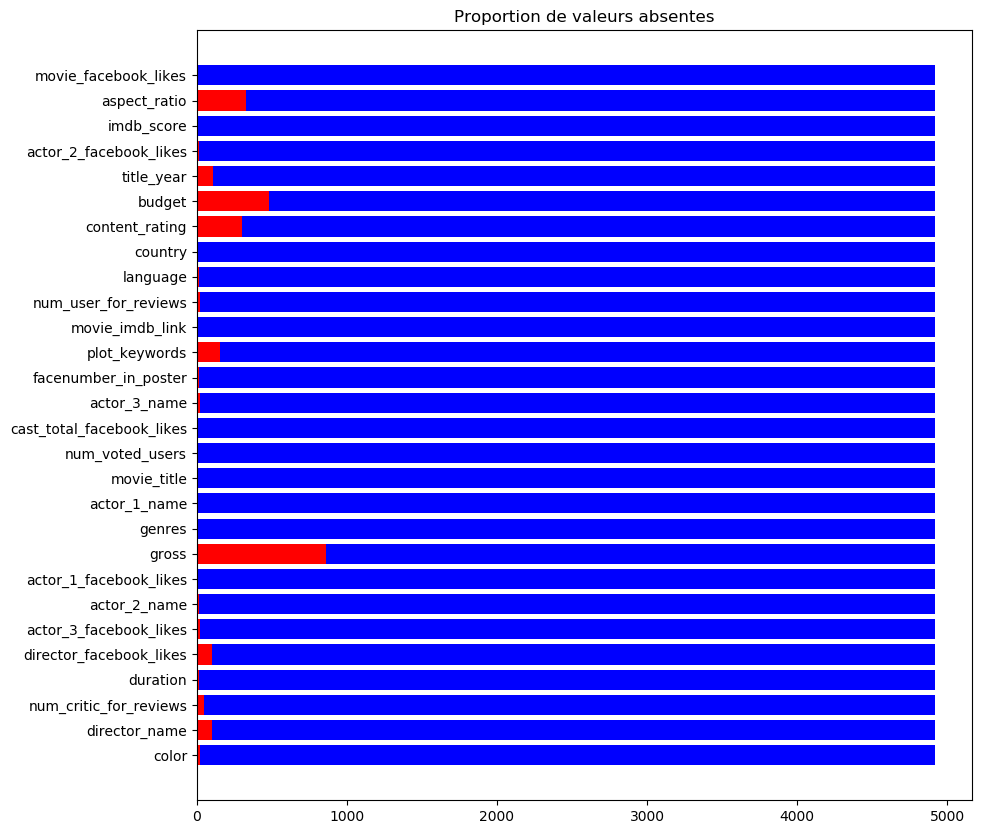

In [17]:
x1=df.isnull().sum().values
x2=df.notnull().sum().values
index = np.arange(len(x1))

fig, ax = plt.subplots(figsize=(10, 10))
plt.barh(index, x1+x2, color='b')
plt.barh(index, x1, color='r')
ax.set_yticks(index)
ax.set_yticklabels(dataraw.columns.values.tolist())
#ax.yaxis_inverted()

plt.title("Proportion de valeurs absentes")

In [18]:
# Liste des colonnes catégorielles
cols = ['color', 'title_year', 'language', 'country', 'content_rating']

for col in df.columns:
    i = df[col].isnull().sum()
    if i > 0:
        if col in cols:
            # On remplace par la valeur la plus courante
            v = df[col].dropna().mode().values[0]
            df[col] = df[col].fillna(v)
            print('NaN de', col, 'remplacé par', v)
        elif df[col].dtype == 'object': 
            # On remplace par une chaine vide
            df[col] = df[col].fillna('')
            print('NaN de', col, 'remplacé par', '""')
        else:
            # On remplace par la médiane (pour diminuer l'impact des outliers)
            v = int(df[col].median())
            df[col] = df[col].fillna(v)
            print('NaN de', col, 'remplacé par', v)


NaN de color remplacé par Color
NaN de director_name remplacé par ""
NaN de num_critic_for_reviews remplacé par 108
NaN de duration remplacé par 103
NaN de director_facebook_likes remplacé par 48
NaN de actor_3_facebook_likes remplacé par 365
NaN de actor_2_name remplacé par ""
NaN de actor_1_facebook_likes remplacé par 982
NaN de gross remplacé par 25035665
NaN de actor_1_name remplacé par ""
NaN de actor_3_name remplacé par ""
NaN de facenumber_in_poster remplacé par 1
NaN de plot_keywords remplacé par ""
NaN de num_user_for_reviews remplacé par 153
NaN de language remplacé par English
NaN de country remplacé par USA
NaN de content_rating remplacé par R
NaN de budget remplacé par 19900000
NaN de title_year remplacé par 2009.0
NaN de actor_2_facebook_likes remplacé par 593
NaN de aspect_ratio remplacé par 2


In [19]:
df.isnull().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0], dtype=int64)

### Colonnes inutiles

In [20]:
df = DropCol(df, 'movie_imdb_link')

### Valeurs aberrantes

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


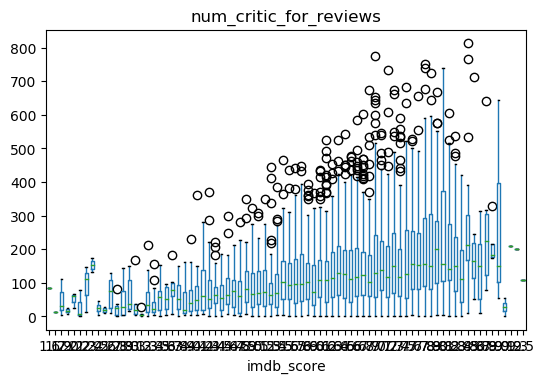

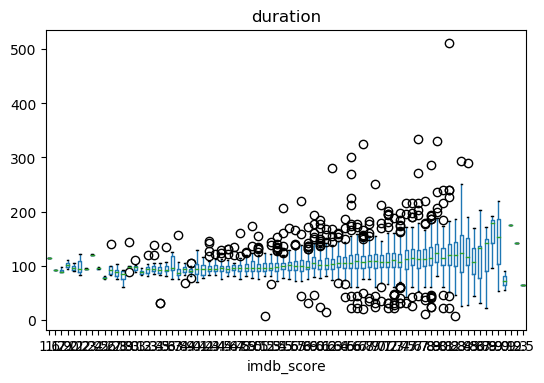

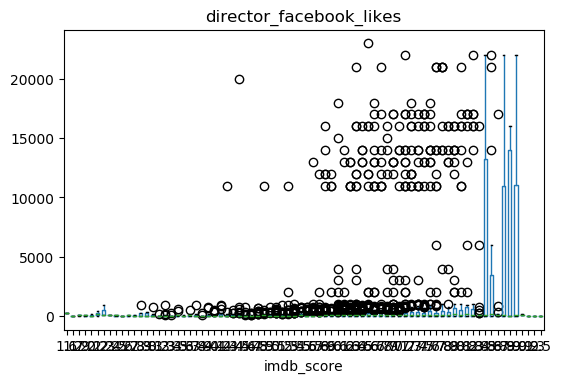

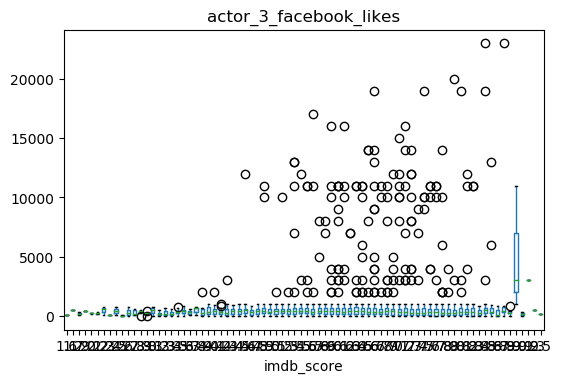

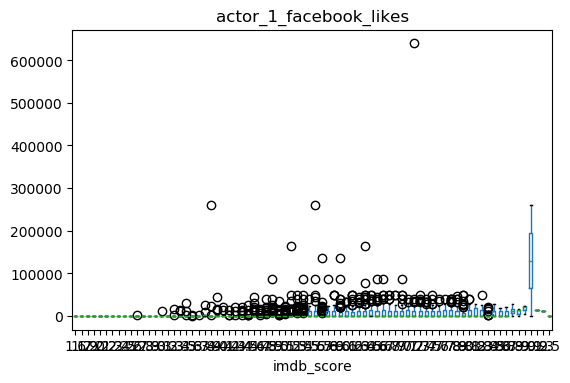

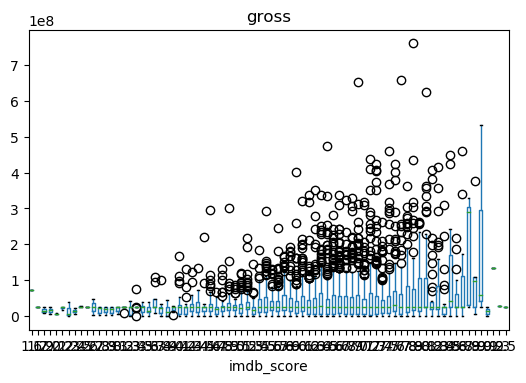

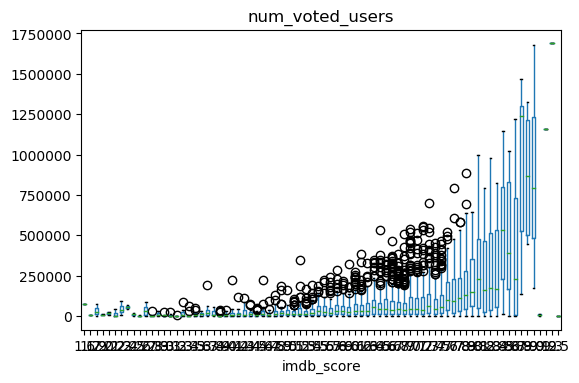

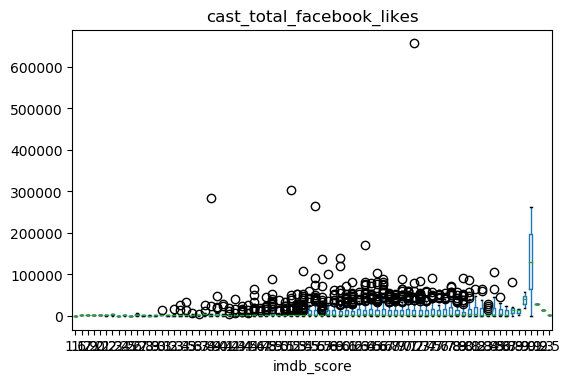

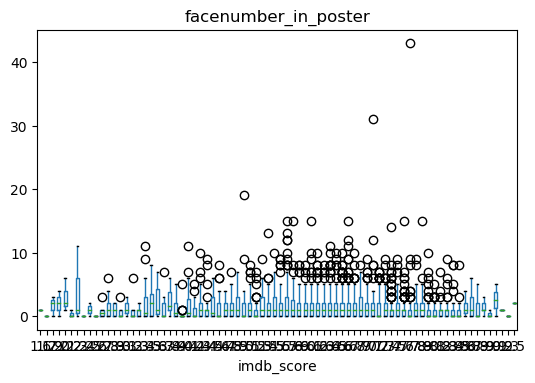

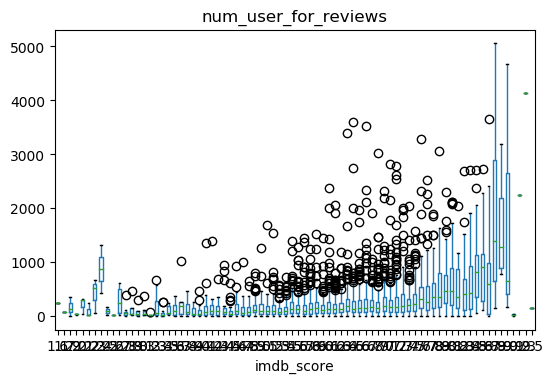

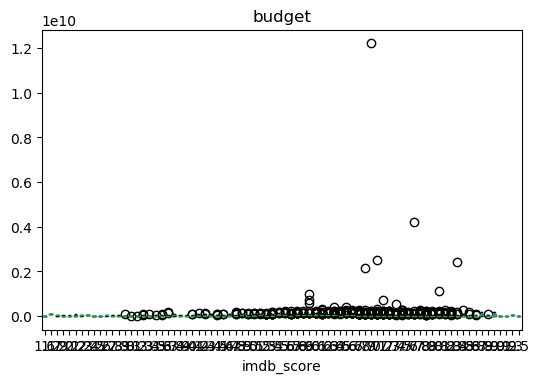

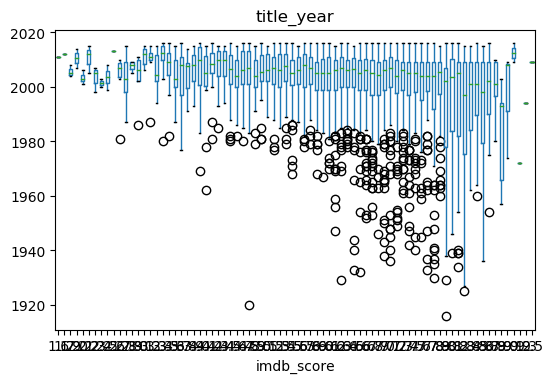

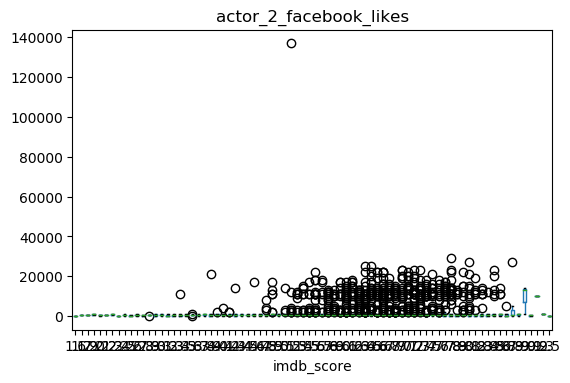

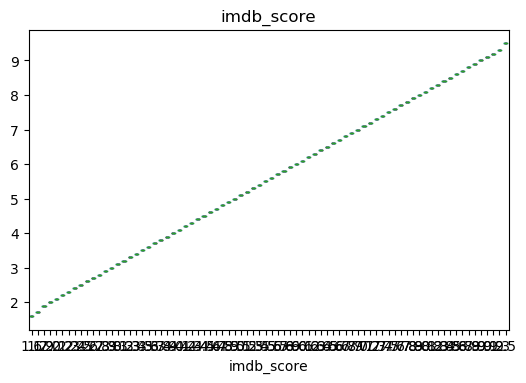

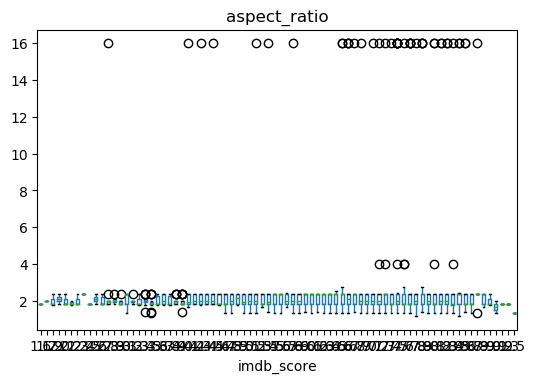

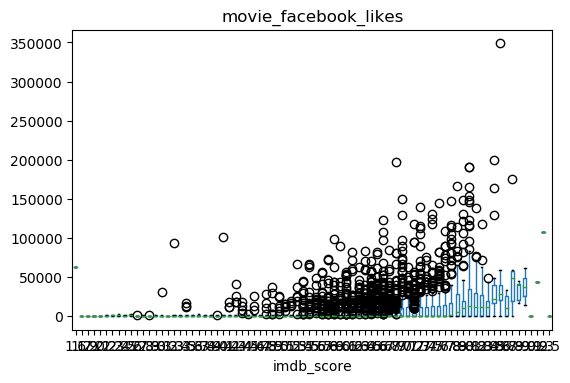

In [21]:
for col in df.columns:
    if df[col].dtype == 'object': continue
    fig, ax = plt.subplots(figsize=(6,4))
    fig = df.boxplot(col, 'imdb_score', ax=ax, grid=False)
    plt.suptitle("")

### Budget anormal

In [22]:
# Budget anormal
df.sort_values(by='budget', ascending=False).head(20)[['movie_title','budget','gross', 'title_year', 'country']]

,movie_title,budget,gross,title_year,country
2939,The Host(2006),1.221550e+10,2201412.0,2006.0,South Korea
3790,Lady Vengeance,4.200000e+09,211667.0,2005.0,South Korea
2956,Fateless,2.500000e+09,195888.0,2005.0,Hungary
2293,Princess Mononoke,2.400000e+09,2298191.0,1997.0,Japan
2304,Steamboy,2.127520e+09,410388.0,2004.0,Japan
3363,Akira,1.100000e+09,439162.0,1988.0,Japan
4443,Godzilla 2000,1.000000e+09,10037390.0,1999.0,Japan
3782,Tango,7.000000e+08,1687311.0,1998.0,Spain
3024,Kabhi Alvida Naa Kehna,7.000000e+08,3275443.0,2006.0,India
3218,Kites,6.000000e+08,1602466.0,2010.0,India


In [23]:
# On remplace par la médiane
v = int(df.budget.median())
lst=df[df.budget>=300000000].iloc[1:].index
df.loc[lst, 'budget'] = v
print(len(lst), 'budgets hors norme remplacés par', v)

14 budgets hors norme remplacés par 19900000


### Nombre de likes anormal

In [24]:
# like anormal
cols = ['movie_title', 'cast_total_facebook_likes', 'actor_1_facebook_likes','actor_1_name', 'actor_2_facebook_likes','actor_2_name', 'actor_3_facebook_likes','actor_3_name']
df.sort_values(by='cast_total_facebook_likes', ascending=False).head(43)[cols]

,movie_title,cast_total_facebook_likes,actor_1_facebook_likes,actor_1_name,actor_2_facebook_likes,actor_2_name,actor_3_facebook_likes,actor_3_name
1884,Anchorman: The Legend of Ron Burgundy,656730,640000.0,Darcy Donavan,8000.0,Will Ferrell,7000.0,Steve Carell
1211,The Final Destination,303717,164000.0,Krista Allen,137000.0,Andrew Fiscella,748.0,Shantel VanSanten
4595,Treachery,283939,260000.0,Matthew Ziff,21000.0,Lorraine Ziff,2000.0,Michael Biehn
4488,Hardflip,263584,260000.0,Matthew Ziff,984.0,Randy Wayne,891.0,Raquel Elizabeth Ames
4315,Kickboxer: Vengeance,261818,260000.0,Matthew Ziff,454.0,T.J. Storm,354.0,Sam Medina
3966,Feast,170118,164000.0,Krista Allen,2000.0,Eric Dane,898.0,Henry Rollins
2892,Quarantine,140268,137000.0,Andrew Fiscella,1000.0,Jay Hernandez,1000.0,Dania Ramirez
2240,Armored,137712,137000.0,Andrew Fiscella,459.0,Fred Ward,163.0,Lorna Raver
2355,The Amityville Horror,120797,87000.0,Jimmy Bennett,17000.0,Chloë Grace Moretz,16000.0,Ryan Reynolds
74,Evan Almighty,108016,87000.0,Jimmy Bennett,11000.0,Morgan Freeman,7000.0,Steve Carell


In [25]:
# On remplace par la médiane et on décrémente le total des likes
v = int(df.actor_1_facebook_likes.median())
lst=df[df.actor_1_facebook_likes>50000].index
df.loc[lst, 'cast_total_facebook_likes'] -= df.loc[lst, 'actor_1_facebook_likes']
df.loc[lst, 'cast_total_facebook_likes'] += v
df.loc[lst, 'actor_1_facebook_likes'] = v
print(len(lst), 'actor_1_facebook_likes hors norme remplacés par', v)

v = int(df.actor_2_facebook_likes.median())
lst=df[df.actor_2_facebook_likes>50000].index
df.loc[lst, 'cast_total_facebook_likes'] -= df.loc[lst, 'actor_2_facebook_likes']
df.loc[lst, 'cast_total_facebook_likes'] += v
df.loc[lst, 'actor_2_facebook_likes'] = v
print(len(lst), 'actor_2_facebook_likes hors norme remplacés par', v)

17 actor_1_facebook_likes hors norme remplacés par 982
1 actor_2_facebook_likes hors norme remplacés par 593


In [26]:
# Vérif
df.loc[lst, 'cast_total_facebook_likes']

1211    4292.0
Name: cast_total_facebook_likes, dtype: float64

### Pays anormal

In [27]:
df[df.country.notnull()].country.drop_duplicates()

0                        USA
2                         UK
20               New Zealand
34                    Canada
50                 Australia
84                   Belgium
98                     Japan
113                  Germany
135                    China
239                   France
278                 New Line
500                   Mexico
628                    Spain
687                Hong Kong
1036          Czech Republic
1046                   India
1051            Soviet Union
1062             South Korea
1087                    Peru
1351                   Italy
1368                  Russia
1476                   Aruba
1487                 Denmark
1489                   Libya
1545                 Ireland
1584            South Africa
1693                 Iceland
1713             Switzerland
1728                 Romania
1797            West Germany
1957                   Chile
2093             Netherlands
2202                 Hungary
2321                  Panama
2425          

In [28]:
df.groupby('country').sum().sort_values('budget', ascending=False)

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
country,,,,,,,,,,,,,,,,
USA,524381.0,394949.0,3023096.0,2661078.0,24051730.0,1.860594e+11,335760380,37016549.0,5297.0,1054556.0,1.262742e+11,7440183.0,6688690.0,23655.3,8153.95,28958997
UK,64851.0,47543.0,113918.0,208242.0,2458775.0,1.278873e+10,33119131,3476014.0,553.0,115504.0,1.103324e+10,868712.0,543160.0,2951.3,990.74,3313310
France,20627.0,16777.0,49070.0,68987.0,656909.0,2.804599e+09,8043564,937052.0,179.0,29059.0,4.094864e+09,308764.0,146894.0,1028.5,357.66,758577
Germany,12845.0,10360.0,27456.0,48885.0,567306.0,2.576858e+09,6904949,816433.0,136.0,27260.0,3.077810e+09,188316.0,135600.0,593.7,202.13,467922
Canada,11496.0,12346.0,16484.0,28450.0,293928.0,2.916963e+09,3907226,416531.0,129.0,20799.0,1.940212e+09,248628.0,53560.0,763.1,269.30,329678
Australia,6798.0,5550.0,9223.0,14920.0,212438.0,1.837250e+09,3208126,334466.0,55.0,11797.0,1.523106e+09,106144.0,84404.0,345.7,113.19,480149
China,2612.0,3271.0,5678.0,3479.0,50936.0,5.438345e+08,808644,74118.0,36.0,3085.0,9.857050e+08,56264.0,16421.0,185.1,64.60,64539
India,1091.0,4630.0,2192.0,5467.0,47216.0,3.011679e+08,518283,70618.0,51.0,3088.0,8.997937e+08,68287.0,11631.0,222.1,72.65,94806
New Zealand,2071.0,1579.0,489.0,2715.0,56335.0,9.371650e+08,2155665,71736.0,17.0,9830.0,6.856500e+08,26082.0,8910.0,94.8,28.70,108328


In [29]:
# On remplace par la valeur la plus courante
v = df.country.mode().values[0]
lst=df[df.country.isin(['Official site', 'New Line'])].index
df.loc[lst, 'country'] = v
print(len(lst), 'country non valides remplacées par', v)

2 country non valides remplacées par USA


### Couleur

In [30]:
# Classification binaire, on encode
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder().fit(df.color)
df.color = enc.transform(df.color)
enc.classes_

array([' Black and White', 'Color'], dtype=object)

## Export

In [31]:
df.to_csv('movie_metadata_cleaned.csv', sep="\t", encoding='utf-8', index=False)
df.shape

(4919, 27)

In [32]:
pd.set_option('display.max_rows', 400) 
df[df.movie_title.str.contains(' 3')].sort_values(['movie_title']).movie_title

1609                                 13 Going on 30
4535                   4 Months, 3 Weeks and 2 Days
3636    A Nightmare on Elm Street 3: Dream Warriors
2187             A Very Harold & Kumar 3D Christmas
856                                         Alien 3
1803                                        Case 39
3544    Dolphins and Whales 3D: Tribes of the Ocean
1877                            Final Destination 3
3255                     Glee: The 3D Concert Movie
3371                Green Street 3: Never Back Down
2978             High School Musical 3: Senior Year
3063                           Insidious: Chapter 3
1384                                       Ip Man 3
32                                       Iron Man 3
2135                                     Jackass 3D
153                                 Kung Fu Panda 3
1388                                Lethal Weapon 3
147              Madagascar 3: Europe's Most Wanted
19                                   Men in Black 3
1664        

In [33]:
df[df.movie_title.str.lower().str.contains('saw')].movie_title

2180                                    Texas Chainsaw 3D
2464                            Saw 3D: The Final Chapter
2513           The Texas Chainsaw Massacre: The Beginning
2990                                               Saw VI
3020                                                Saw V
3040                                              Saw III
3045                                               Saw IV
3223                         The Texas Chain Saw Massacre
3474    Alpha and Omega 4: The Legend of the Saw Tooth...
3630                                               Saw II
3760                        The Texas Chainsaw Massacre 2
4389                                                  Saw
Name: movie_title, dtype: object